In [47]:
!pip install dython

In [0]:
import pandas as pd
from IPython.display import display,HTML
import pandas_profiling
import numpy as np
import missingno as msno
from dython.nominal import associations
from scipy.stats import norm, boxcox,skew
from geopy import distance
%matplotlib inline


In [0]:
rider_infos = pd.read_csv("/Riders.csv")
order_data = pd.read_csv("/Train.csv")
test_data = pd.read_csv("/Test.csv")
submission_sample = pd.read_csv("/SampleSubmission.csv")

In [50]:
order_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


In [51]:
test_data.head().T

,0,1,2,3,4
Order No,Order_No_19248,Order_No_12736,Order_No_768,Order_No_15332,Order_No_21373
User Id,User_Id_3355,User_Id_3647,User_Id_2154,User_Id_2910,User_Id_1205
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,3
Personal or Business,Business,Business,Business,Business,Business
Placement - Day of Month,27,17,27,17,11
Placement - Weekday (Mo = 1),3,5,4,1,2
Placement - Time,4:44:10 PM,12:57:35 PM,11:08:14 AM,1:51:35 PM,11:30:28 AM
Confirmation - Day of Month,27,17,27,17,11
Confirmation - Weekday (Mo = 1),3,5,4,1,2


In [52]:
rider_infos.head().T

,0,1,2,3,4
Rider Id,Rider_Id_396,Rider_Id_479,Rider_Id_648,Rider_Id_753,Rider_Id_335
No_Of_Orders,2946,360,1746,314,536
Age,2298,951,821,980,1113
Average_Rating,14,13.5,14.3,12.5,13.7
No_of_Ratings,1159,176,466,75,156


In [53]:
#profile = order_data.copy().profile_report(title='Data report')
profile = pandas_profiling.ProfileReport(order_data)
#profile.to_file(output_file="Data_report.html")
profile
#display(HTML('<iframe src="Data_report.html" height="500" width="100%"></iframe> '))

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,29
Number of observations,5426
Total Missing (%),4.1%
Total size in memory,1.2 MiB
Average record size in memory,232.0 B
Numeric,11
Categorical,8
Boolean,0
Date,0
Text (Unique),1
Rejected,9


In [0]:
# fill temperature with mean
mean_temp = order_data.Temperature.mean()
order_data.Temperature.fillna(value=mean_temp,inplace=True)
test_data.Temperature.fillna(value=mean_temp,inplace=True)

In [55]:
train_data = order_data.merge(rider_infos, on=['Rider Id'])
test_data = test_data.merge(rider_infos, on=['Rider Id'])
train_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Placement - Day of Month,9,18,31,2,22
Placement - Weekday (Mo = 1),5,5,5,2,2
Placement - Time,9:35:46 AM,3:41:17 PM,12:51:41 PM,7:12:10 AM,10:40:58 AM
Confirmation - Day of Month,9,18,31,2,22
Confirmation - Weekday (Mo = 1),5,5,5,2,2


In [56]:
test_data.head().T

,0,1,2,3,4
Order No,Order_No_19248,Order_No_2699,Order_No_21486,Order_No_19336,Order_No_20374
User Id,User_Id_3355,User_Id_592,User_Id_478,User_Id_2801,User_Id_3465
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,1,3,3,3
Personal or Business,Business,Personal,Business,Business,Business
Placement - Day of Month,27,26,29,2,14
Placement - Weekday (Mo = 1),3,2,5,1,4
Placement - Time,4:44:10 PM,2:43:21 PM,11:55:05 AM,9:23:21 AM,12:55:59 PM
Confirmation - Day of Month,27,26,29,2,14
Confirmation - Weekday (Mo = 1),3,2,5,1,4


In [57]:
train_data.isnull().any()

Order No                                     False
User Id                                      False
Vehicle Type                                 False
Platform Type                                False
Personal or Business                         False
Placement - Day of Month                     False
Placement - Weekday (Mo = 1)                 False
Placement - Time                             False
Confirmation - Day of Month                  False
Confirmation - Weekday (Mo = 1)              False
Confirmation - Time                          False
Arrival at Pickup - Day of Month             False
Arrival at Pickup - Weekday (Mo = 1)         False
Arrival at Pickup - Time                     False
Pickup - Day of Month                        False
Pickup - Weekday (Mo = 1)                    False
Pickup - Time                                False
Arrival at Destination - Day of Month        False
Arrival at Destination - Weekday (Mo = 1)    False
Arrival at Destination - Time  

In [0]:
from pandas.api.types import is_numeric_dtype
def change_types(df):
    int_to_float_columns = ["Time from Pickup to Arrival","Distance (KM)"]
    for column in df.columns:
        if(not is_numeric_dtype(df[column])):
            df[column] = df[column].astype("category")
        elif(np.issubdtype(df[column], np.int64) and column not in int_to_float_columns):
            df[column] = df[column].astype("category")
        elif(column in int_to_float_columns):
            df[column] = df[column].astype("float")

change_types(train_data)
change_types(test_data)

In [0]:
def compute_time_hour(row):
  temp = row['Pickup - Time'].split(':')
  if(len(temp) > 1):
    return temp[2][2:]
  else:
    return temp[0]

train_data['Pickup - Hour'] = pd.to_datetime(train_data['Pickup - Time']).dt.hour
train_data['Pickup - Time'] = train_data['Pickup - Time'].astype(str)
train_data['Pickup - Hour - Time'] = train_data.apply(compute_time_hour,axis=1)

test_data['Pickup - Hour'] = pd.to_datetime(test_data['Pickup - Time']).dt.hour
test_data['Pickup - Time'] = test_data['Pickup - Time'].astype(str)
test_data['Pickup - Hour - Time'] = test_data.apply(compute_time_hour,axis=1)

train_data.drop(columns=["Pickup - Time"],inplace=True)
test_data.drop(columns=["Pickup - Time"],inplace=True)

In [60]:
train_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Placement - Day of Month,9,18,31,2,22
Placement - Weekday (Mo = 1),5,5,5,2,2
Placement - Time,9:35:46 AM,3:41:17 PM,12:51:41 PM,7:12:10 AM,10:40:58 AM
Confirmation - Day of Month,9,18,31,2,22
Confirmation - Weekday (Mo = 1),5,5,5,2,2


In [0]:
train_data = train_data.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)
test_data = test_data.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)
#train_data['Pickup - Time'].unique()


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5425 entries, 0 to 5424
Data columns (total 34 columns):
Order No                                     5425 non-null category
User Id                                      5425 non-null category
Vehicle Type                                 5425 non-null category
Platform Type                                5425 non-null category
Personal or Business                         5425 non-null category
Placement - Day of Month                     5425 non-null category
Placement - Weekday (Mo = 1)                 5425 non-null category
Placement - Time                             5425 non-null category
Confirmation - Day of Month                  5425 non-null category
Confirmation - Weekday (Mo = 1)              5425 non-null category
Confirmation - Time                          5425 non-null category
Arrival at Pickup - Day of Month             5425 non-null category
Arrival at Pickup - Weekday (Mo = 1)         5425 non-null category
Arrival a

In [0]:
def compute_distance(row):
    src = (row["Pickup Lat"],row["Pickup Long"])
    dest= (row["Destination Lat"],row["Destination Long"])
    return distance.distance(src,dest).km

train_data["geopy_distance"] = train_data.apply(compute_distance,axis=1)
test_data["geopy_distance"] = test_data.apply(compute_distance,axis=1)

In [64]:
columns_to_drop_both = [
        'Vehicle Type',
       'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
       'Arrival at Pickup - Time']
columns_to_drop_train = ['Arrival at Destination - Day of Month',
        'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time']
train_data.drop(columns=columns_to_drop_both + columns_to_drop_train,inplace=True)
test_data.drop(columns=columns_to_drop_both,inplace=True)
train_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Pickup - Day of Month,9,18,31,2,22
Pickup - Weekday (Mo = 1),5,5,5,2,2
Distance (KM),4,20,6,18,7
Temperature,20.4,24.5,24.7,15.2,19.2
Precipitation in millimeters,NaN,NaN,NaN,NaN,NaN
Pickup Lat,-1.31775,-1.32677,-1.25519,-1.29031,-1.27352


In [65]:
'''train_data['month_quart'] = ((train_data['Pickup - Day of Month'] - 1) // 7) + 1
train_data['month_quart'] = train_data['month_quart'].map({1.0:1.0,2.0:2.0,3.0:3.0,4.0:4.0,5.0:4.0})

test_data['month_quart'] = ((test_data['Pickup - Day of Month'] - 1) // 7) + 1
test_data['month_quart'] = test_data['month_quart'].map({1.0:1.0,2.0:2.0,3.0:3.0,4.0:4.0,5.0:4.0})
train_data.head().T'''

"train_data['month_quart'] = ((train_data['Pickup - Day of Month'] - 1) // 7) + 1\ntrain_data['month_quart'] = train_data['month_quart'].map({1.0:1.0,2.0:2.0,3.0:3.0,4.0:4.0,5.0:4.0})\n\ntest_data['month_quart'] = ((test_data['Pickup - Day of Month'] - 1) // 7) + 1\ntest_data['month_quart'] = test_data['month_quart'].map({1.0:1.0,2.0:2.0,3.0:3.0,4.0:4.0,5.0:4.0})\ntrain_data.head().T"

In [0]:
from sklearn.decomposition import PCA
X = np.vstack((train_data[['Pickup Lat', 'Pickup Long']], 
               train_data[['Destination Lat', 'Destination Long']]))

pca = PCA().fit(X)
X_pca = pca.transform(X)

train_data['pickup_pca0'] = pca.transform(train_data[['Pickup Lat', 'Pickup Long']])[:,0]
train_data['pickup_pca1'] = pca.transform(train_data[['Pickup Lat', 'Pickup Long']])[:,1]

train_data['dropoff_pca0'] = pca.transform(train_data[['Destination Lat', 'Destination Long']])[:,0]
train_data['dropoff_pca1'] = pca.transform(train_data[['Destination Lat', 'Destination Long']])[:,1]

test_data['pickup_pca0'] = pca.transform(test_data[['Pickup Lat', 'Pickup Long']])[:,0]
test_data['pickup_pca1'] = pca.transform(test_data[['Pickup Lat', 'Pickup Long']])[:,1]

test_data['dropoff_pca0'] = pca.transform(test_data[['Destination Lat', 'Destination Long']])[:,0]
test_data['dropoff_pca1'] = pca.transform(test_data[['Destination Lat', 'Destination Long']])[:,1]



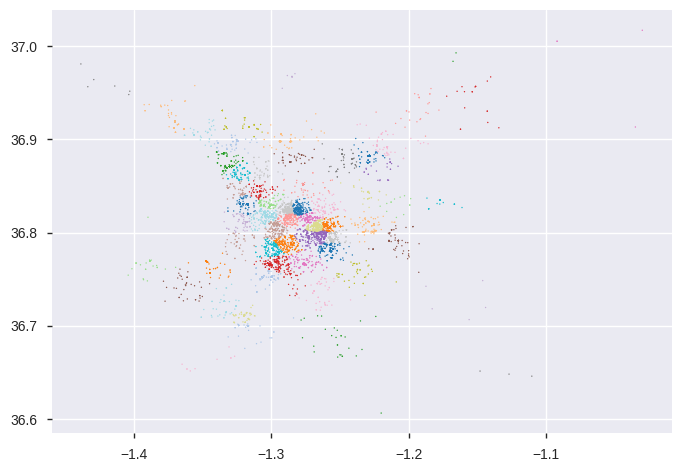

In [67]:
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
kmeans = MiniBatchKMeans(n_clusters=8**2, batch_size=32**3).fit(X)
sample_ind = np.random.permutation(len(X))[:10000]
plt.scatter(X[sample_ind,0], X[sample_ind,1], s=1, lw=0, 
            c=kmeans.predict(X[sample_ind]), cmap='tab20')
train_data['pickup_cluster'] = kmeans.predict(train_data[['Pickup Lat', 'Pickup Long']])
train_data['dropoff_cluster'] = kmeans.predict(train_data[['Destination Lat', 'Destination Long']])

test_data['pickup_cluster'] = kmeans.predict(test_data[['Pickup Lat', 'Pickup Long']])
test_data['dropoff_cluster'] = kmeans.predict(test_data[['Destination Lat', 'Destination Long']])

In [68]:
train_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Pickup - Day of Month,9,18,31,2,22
Pickup - Weekday (Mo = 1),5,5,5,2,2
Distance (KM),4,20,6,18,7
Temperature,20.4,24.5,24.7,15.2,19.2
Precipitation in millimeters,NaN,NaN,NaN,NaN,NaN
Pickup Lat,-1.31775,-1.32677,-1.25519,-1.29031,-1.27352


In [0]:
from sklearn.utils import shuffle
train_data = shuffle(train_data).reset_index(drop=True)

In [0]:
# save prepocessed data
train_data.to_pickle("meetup_data.pkl")
test_data.to_pickle("meetup_test.pkl")

In [0]:
#load data
train_data = pd.read_pickle("meetup_data.pkl")
test_zindi = pd.read_pickle("meetup_test.pkl")

In [0]:
train_data.drop(columns=["Order No","Rider Id","User Id"],axis=1,inplace=True)
test_zindi.drop(columns=["Order No","Rider Id","User Id"],axis=1,inplace=True)

In [73]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(train_data.dropna())  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10,random_state=42, sample_posterior=False, tol=0.001,
                 verbose=0)
res = imp.transform(train_data)
train_data_with_nan_imputing = pd.DataFrame(res,columns=train_data.columns)
train_data_with_nan_imputing .isnull().any()'''

"from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)\nimp.fit(train_data.dropna())  \nIterativeImputer(add_indicator=False, estimator=None,\n                 imputation_order='ascending', initial_strategy='mean',\n                 max_iter=10,random_state=42, sample_posterior=False, tol=0.001,\n                 verbose=0)\nres = imp.transform(train_data)\ntrain_data_with_nan_imputing = pd.DataFrame(res,columns=train_data.columns)\ntrain_data_with_nan_imputing .isnull().any()"

In [74]:
!pip install catboost

In [0]:
#Imports

from sklearn.linear_model import HuberRegressor,SGDRegressor,ElasticNet, Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [76]:
test_data.head().T

,0,1,2,3,4
Order No,Order_No_19248,Order_No_2699,Order_No_21486,Order_No_19336,Order_No_20374
User Id,User_Id_3355,User_Id_592,User_Id_478,User_Id_2801,User_Id_3465
Platform Type,3,1,3,3,3
Personal or Business,Business,Personal,Business,Business,Business
Pickup - Day of Month,27,26,29,2,14
Pickup - Weekday (Mo = 1),3,2,5,1,4
Distance (KM),8,19,9,15,15
Temperature,23.2395,23.2395,19.7,16.4,21.3
Precipitation in millimeters,NaN,NaN,NaN,NaN,NaN
Pickup Lat,-1.33327,-1.31275,-1.25519,-1.31045,-1.33327


In [77]:
train_data.drop(columns=['Precipitation in millimeters'],axis=1,inplace=True)
test_data.drop(columns=['Precipitation in millimeters'],axis=1,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 24 columns):
Platform Type                  5425 non-null category
Personal or Business           5425 non-null category
Pickup - Day of Month          5425 non-null category
Pickup - Weekday (Mo = 1)      5425 non-null category
Distance (KM)                  5425 non-null float64
Temperature                    5425 non-null float64
Pickup Lat                     5425 non-null float64
Pickup Long                    5425 non-null float64
Destination Lat                5425 non-null float64
Destination Long               5425 non-null float64
Time from Pickup to Arrival    5425 non-null float64
No_Of_Orders                   5425 non-null float64
Age                            5425 non-null float64
Average_Rating                 5425 non-null float64
No_of_Ratings                  5425 non-null float64
Pickup - Hour                  5425 non-null int64
Pickup - Hour - Time           5425 non-nul

In [0]:
train_data = pd.get_dummies(train_data,columns=['Personal or Business','Pickup - Hour - Time'])
test_data = pd.get_dummies(test_data,columns=['Personal or Business','Pickup - Hour - Time'])

In [79]:
def rmse(y_true,y_preds,extras=None):
    return np.sqrt(mean_squared_error(y_true,y_preds))
  

from sklearn.model_selection import train_test_split, KFold,cross_val_score
train_x,val_x,train_y,val_y = train_test_split(train_data,train_data['Time from Pickup to Arrival'],test_size=0.3)

train_x.drop(columns=['Time from Pickup to Arrival'],axis=1,inplace=True)
val_x.drop(columns=['Time from Pickup to Arrival'],axis=1,inplace=True)
train_x.shape, val_x.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((3797, 25), (1628, 25))

In [0]:
def rmsle_cv(model,train,y_train,n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(np.mean(rmse))

def benchmark_model(train_x,train_y):
    for Model in [RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,XGBRegressor,LGBMRegressor, ElasticNet, LinearRegression,HuberRegressor]:
        model = Model()
        model_name = model.__class__.__name__
        err = rmsle_cv(model,train_x,train_y)
        print(f"{model_name} :  cross val loss => {err}")

In [81]:
benchmark_model(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RandomForestRegressor :  cross val loss => 872.4579046200946


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

ExtraTreesRegressor :  cross val loss => 876.7635138486612
GradientBoostingRegressor :  cross val loss => 816.4480493302234
[22:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor :  cross val loss => 815.4522876209451
LGBMRegressor :  cross val loss => 821.9786534113488
ElasticNet :  cross val loss => 831.2777620808407
LinearRegression :  cross val loss => 831.4760758324555
HuberRegressor :  cross val loss => 850.23945058752


In [82]:
lgbm = LGBMRegressor().fit(train_x,train_y)
xgbm = XGBRegressor().fit(train_x.values,train_y)

rmse(lgbm.predict(val_x),val_y),rmse(xgbm.predict(val_x.values),val_y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(829.0984820359646, 814.7845833374636)

In [0]:
data = pd.read_pickle("meetup_data.pkl")
test_zindi = pd.read_pickle("meetup_test.pkl")

data.drop(columns=["Order No","Precipitation in millimeters"],inplace=True)
test_zindi.drop(columns=["Precipitation in millimeters"],inplace=True)

#data.dropna(inplace=True)


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 26 columns):
User Id                        5425 non-null category
Platform Type                  5425 non-null category
Personal or Business           5425 non-null category
Pickup - Day of Month          5425 non-null category
Pickup - Weekday (Mo = 1)      5425 non-null category
Distance (KM)                  5425 non-null float64
Temperature                    5425 non-null float64
Pickup Lat                     5425 non-null float64
Pickup Long                    5425 non-null float64
Destination Lat                5425 non-null float64
Destination Long               5425 non-null float64
Rider Id                       5425 non-null category
Time from Pickup to Arrival    5425 non-null float64
No_Of_Orders                   5425 non-null float64
Age                            5425 non-null float64
Average_Rating                 5425 non-null float64
No_of_Ratings                  5425 non

In [0]:
data = data.astype({"Platform Type":"int","Pickup - Day of Month":"int",
                    "Pickup - Weekday (Mo = 1)":"int","Pickup - Hour":"int"},copy=False)
test_zindi = test_zindi.astype({"Platform Type":"int","Pickup - Day of Month":"int",
                    "Pickup - Weekday (Mo = 1)":"int","Pickup - Hour":"int"},copy=False)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 26 columns):
User Id                        5425 non-null category
Platform Type                  5425 non-null int64
Personal or Business           5425 non-null category
Pickup - Day of Month          5425 non-null int64
Pickup - Weekday (Mo = 1)      5425 non-null int64
Distance (KM)                  5425 non-null float64
Temperature                    5425 non-null float64
Pickup Lat                     5425 non-null float64
Pickup Long                    5425 non-null float64
Destination Lat                5425 non-null float64
Destination Long               5425 non-null float64
Rider Id                       5425 non-null category
Time from Pickup to Arrival    5425 non-null float64
No_Of_Orders                   5425 non-null float64
Age                            5425 non-null float64
Average_Rating                 5425 non-null float64
No_of_Ratings                  5425 non-null flo

In [87]:
train_x,val_x,train_y,val_y = train_test_split(data,data['Time from Pickup to Arrival'],test_size=0.3)

train_x.drop(columns=['Time from Pickup to Arrival'],axis=1,inplace=True)
val_x.drop(columns=['Time from Pickup to Arrival'],axis=1,inplace=True)
train_x.shape, val_x.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((3797, 25), (1628, 25))

In [88]:
# initialize Pool
cat_features = ['Platform Type','Pickup - Day of Month','User Id','Pickup - Weekday (Mo = 1)','Personal or Business','Rider Id','Pickup - Hour','Pickup - Hour - Time']
train_pool = Pool(train_x,train_y ,
                 cat_features=cat_features
                 )
test_pool = Pool(val_x, 
                cat_features=cat_features
                ) 

# specify the training parameters 
model = CatBoostRegressor(loss_function='RMSE')
#train the model
model.fit(train_pool,silent=True)
# make the prediction using the resulting model
predictions = model.predict(test_pool)
err = rmse(val_y, predictions)
print(f"rmse val error: {err}")

rmse val error: 832.3518327960162


In [0]:
import seaborn as sns
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title,ax=None):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue',ax=ax) \
       .set_title(title, fontsize = 15)

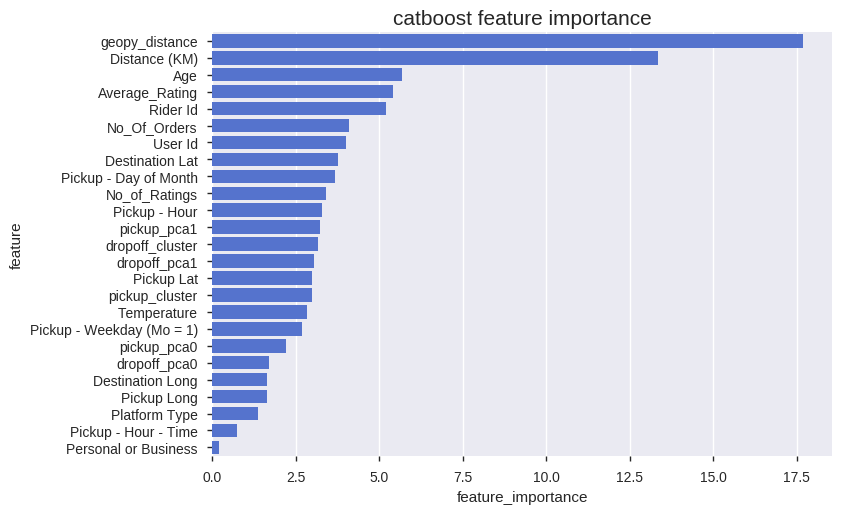

In [90]:
import seaborn as sns
base_imp = imp_df(train_x.columns, model.feature_importances_)
var_imp_plot(base_imp, "catboost feature importance")    
plt.show()

Submission Time

In [0]:
order_no = test_zindi["Order No"]
test_zindi.drop(columns=["Order No"],axis=1,inplace=True)

In [0]:
submission_pool = Pool(test_zindi, 
                cat_features=cat_features
                )

In [0]:
predictions = model.predict(submission_pool)
df_submission = pd.DataFrame()
df_submission["Order_No"] = order_no
df_submission["Time from Pickup to Arrival"] = predictions

In [0]:
df_submission.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1597.678552
1,Order_No_2699,2698.748150
2,Order_No_21486,1786.202777
3,Order_No_19336,2318.683053
4,Order_No_20374,2446.266132


In [0]:
df_submission.to_csv("catboost_v1.csv",index=False)

In [0]:
df_submission.query("Order_No == 'Order_No_1199'" )

,Order_No,Time from Pickup to Arrival
67,Order_No_1199,1609.058252


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data['Time from Pickup to Arrival'], test_size=0.15, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print('Training features Shape:', X_train.shape)
print('Training labels Shape:', y_train.shape)
'''print('Validation features Shape:', X_valid.shape)
print('Validation labels Shape:', y_valid.shape)'''
print('Testing features Shape:', X_test.shape)
print('Testing labels Shape:', y_test.shape)

Training features Shape: (18020, 30)
Training labels Shape: (18020,)
Testing features Shape: (3181, 30)
Testing labels Shape: (3181,)


In [0]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,forest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
import numpy as np


#labels are the variable that we want to predict
train_labels = np.array(train_y)

#features represent the predictors also named independant variables
train_features = train_x

#save the features list 
features_list = list(train_features)

#convert to numpy array
train_features = np.array(train_features)

# we will model for both Random Forest,MultiLinear Regression, ExtraTreeRegressor and XGBoost

#Set params for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_labels)
dvalid = xgb.DMatrix(val_x.drop('Time from Pickup to Arrival',axis=1).values)
evals = [(dtrain, 'train')]
params = {
        'min_child_weight': 100, 'eta': 0.05,
        'colsample_bytree':0.3,'max_depth': 10,
        'subsample': 0.7,'lambda':0.01,
        'booster': 'gbtree', 'gamma': 0.6,
        'eval_metric':'rmse',
        'objective': 'reg:squarederror','n_estimators':1000,
        'n_jobs':-1
        #,'base_score':0.5
    }

#validation features
valid_features = val_x

models = []
models.append(('MultiLinearRegression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor(n_estimators=1000, min_samples_leaf=100, max_features=0.7, n_jobs=-1)))
models.append(('ExtaTreeRegressor', ExtraTreesRegressor(n_estimators=1000, bootstrap=True, min_samples_leaf=100, max_features='auto', n_jobs=-1)))
models.append(('XGBoost',xgb))

results = []
names = []
errors = []
for name, model in models:
 if(name=='XGBoost'):
   model= model.train(params=params, dtrain=dtrain, num_boost_round=227,evals=evals, early_stopping_rounds=300,maximize=False,verbose_eval=20)
   predictions = model.predict(dvalid)
 else:
    model.fit(train_features,train_labels)
    predictions = model.predict(valid_features)
 #result = r2_score(y_test,predictions)
 error = sqrt(mean_squared_error(val_y,predictions))
 errors.append(error)
 results.append(result)
 names.append(name)

In [0]:
name = pd.DataFrame(data=names,columns=['Model'],index=[0,1,2,3])
score = pd.DataFrame(data=results,columns=['Score'],index=[0,1,2,3])
error = pd.DataFrame(data=errors,columns=['RMSE'],index=[0,1,2,3])
model_score = pd.concat([name,score],axis=1)
model_score = pd.concat([model_score,error],axis=1)
model_score['Score'] = model_score['Score']*100
model_score

,Model,Score,RMSE
0,MultiLinearRegression,34.218685,801.572293
1,Random Forest,37.246440,782.907774
2,ExtaTreeRegressor,35.639387,792.869123
3,XGBoost,41.792076,754.019324


In [0]:
#Set params for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_labels)
dvalid = xgb.DMatrix(X_test.drop('Time from Pickup to Arrival',axis=1).values)
evals = [(dtrain, 'train')]
params = {
        'min_child_weight': 100, 'eta': 0.05,
        'colsample_bytree':0.3,'max_depth': 10,
        'subsample': 0.7,'lambda':1,
        'booster': 'gbtree', 'gamma': 0.7,
        'eval_metric':'rmse',
        'objective': 'reg:squarederror','n_estimators':1000,
        'n_jobs':-1
        #,'base_score':0.5
    }

#validation features
valid_features = X_test.drop('Time from Pickup to Arrival',axis=1)
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=227,evals=evals,
                      early_stopping_rounds=300,maximize=False,verbose_eval=0)
valid_set_prediction = xgb_model.predict(dvalid)
valid_error = error = sqrt(mean_squared_error(y_test,valid_set_prediction))
score = r2_score(y_test,valid_set_prediction)*100

name = pd.DataFrame(data=names[3],columns=['Model'],index=[0])
valid_score = pd.DataFrame(data=score,columns=['Validation Score'],index=[0])
error = pd.DataFrame(data=valid_error,columns=['Validation RMSE'],index=[0])
model_score = pd.concat([name,valid_score],axis=1)
model_summary = pd.concat([model_score,error],axis=1)
model_summary

,Model,Validation Score,Validation RMSE
0,XGBoost,41.913286,753.23384


In [0]:
f = 'gain'
importance = xgb_model.get_score(importance_type= f)
print(len(importance))

28


In [0]:
variable_scores = np.zeros(len(valid_features.columns))
for key in importance: 
  indice = int(key[1:])
  print(indice)
  variable_scores[indice] = importance[key]

15
10
25
7
6
21
17
28
26
8
12
4
16
9
27
11
2
24
1
14
23
22
3
18
13
0
20
19


In [0]:
model_score = pd.DataFrame(data=variable_scores,index = valid_features.columns,columns=['Feature importance'])
model_score

,Feature importance
Platform Type,1.927315e+06
Pickup - Day of Month,2.116809e+06
Pickup - Weekday (Mo = 1),2.757566e+06
Distance (KM),3.176288e+07
Temperature,2.255494e+06
Precipitation in millimeters,0.000000e+00
Pickup Lat,4.292383e+06
Pickup Long,4.977534e+06
Destination Lat,3.866011e+06
Destination Long,6.045648e+06


In [0]:
speed_data = pd.read_csv("/speeds2018-Q1.csv")
speed_data.head()

,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,speed_kph_mean,speed_kph_stddev,speed_kph_p50,speed_kph_p85
0,2018,1,14,b098577634a096fc666b4561c71ebd17d3fe5be2,675fca457e7775ceafbd48914e2ea2ba1a512e1b,eb5298c61b364b04a30a03e0eceee6af2ff3bf58,43.135,18.399,38.389,57.871
1,2018,1,22,b098577634a096fc666b4561c71ebd17d3fe5be2,675fca457e7775ceafbd48914e2ea2ba1a512e1b,eb5298c61b364b04a30a03e0eceee6af2ff3bf58,44.315,21.179,39.100,59.235
2,2018,1,22,b098577634a096fc666b4561c71ebd17d3fe5be2,eb5298c61b364b04a30a03e0eceee6af2ff3bf58,675fca457e7775ceafbd48914e2ea2ba1a512e1b,50.962,20.620,46.327,65.985
3,2018,1,7,b098577634a096fc666b4561c71ebd17d3fe5be2,eb5298c61b364b04a30a03e0eceee6af2ff3bf58,675fca457e7775ceafbd48914e2ea2ba1a512e1b,32.027,18.358,31.862,46.903
4,2018,1,23,b098577634a096fc666b4561c71ebd17d3fe5be2,eb5298c61b364b04a30a03e0eceee6af2ff3bf58,675fca457e7775ceafbd48914e2ea2ba1a512e1b,54.981,22.480,49.319,67.236
